In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
low_memory=False

%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

In [2]:

producao = pd.ExcelFile('producao.xlsx')
arquivo = pd.read_excel(producao, sheet_name='CONTROLE')

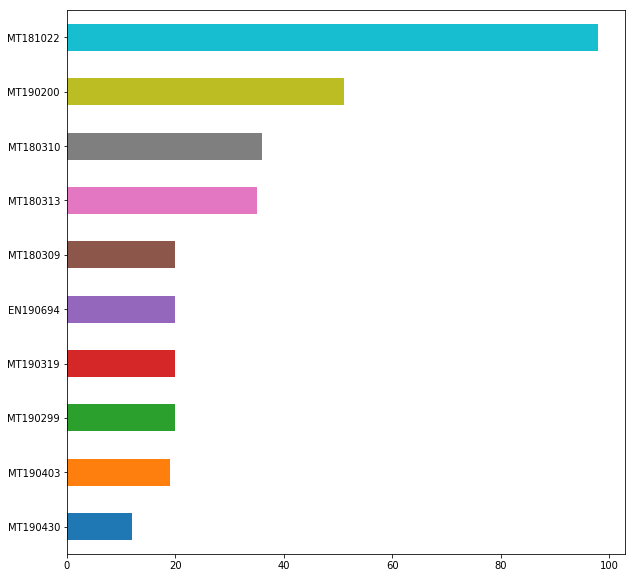

In [3]:
arquivo.query('ENTREGA == "NOK"')['P.O.:'].value_counts().sort_values().tail(10).plot(kind='barh',figsize=(10,10))

In [4]:
print('Projetos em andamento')
arquivo.query('ENTREGA == "NOK"')['P.O.:'].value_counts()

Projetos em andamento


MT181022    98
MT190200    51
MT180310    36
MT180313    35
MT180309    20
EN190694    20
MT190319    20
MT190299    20
MT190403    19
MT190430    12
EN190704    10
EN190731     6
MT990000     6
MT190004     5
MT190429     5
MT190528     4
EN190668     4
990000       4
EN190617     3
MT180307     3
EN190614     3
EN190485     2
EN190719     2
EN190638     2
MT190262     2
EN190504     2
EN190502     1
EN190468     1
MT190525     1
MT190404     1
EN190506     1
EN190337     1
EN190701     1
EN190659     1
EN190459     1
MT190712     1
EN190761     1
MT181634     1
EN190646     1
MT190633     1
EN17172      1
EN190754     1
MT181124     1
EN190663     1
MT180312     1
MT190707     1
MT181546     1
MT181118     1
EN190753     1
MT190405     1
EN190723     1
EN190708     1
EN190716     1
EN190549     1
EN190693     1
EN190452     1
VERBAL       1
EN190610     1
EN190748     1
MT190451     1
EN190391     1
MT190140     1
EN190655     1
Name: P.O.:, dtype: int64

In [5]:
print('HORAS DE TORNO')
print(arquivo.query('ENTREGA == "NOK"')['TORNO'].sum()/60)
totalt=(arquivo.query('ENTREGA == "NOK"')['TORNO'].sum()/60)/8
print(f'O torno está ocupado por um total de {int(totalt)} dias')

HORAS DE TORNO
526.45
O torno está ocupado por um total de 65 dias


In [6]:
print('HORAS DE FRESA')
arquivo.query('ENTREGA == "NOK"')['FRESA'].sum()/60
totalf=(arquivo.query('ENTREGA == "NOK"')['FRESA'].sum()/60)/8
print(f'A fresadora está ocupado por um total de {int(totalf)} dias')

HORAS DE FRESA
A fresadora está ocupado por um total de 90 dias


In [7]:
print('HORAS DE PROGRAMAÇÃO')
arquivo.query('ENTREGA == "NOK"')['PROG.'].sum()/60
totalp=(arquivo.query('ENTREGA == "NOK"')['PROG.'].sum()/60)/8
print(f'A programação está ocupado por um total de {int(totalp)} dias')

HORAS DE PROGRAMAÇÃO
A programação está ocupado por um total de 48 dias


In [8]:
print('HORAS DE AJUSTAGEM')
arquivo.query('ENTREGA == "NOK"')['AJUST'].sum()/60
totala=(arquivo.query('ENTREGA == "NOK"')['AJUST'].sum()/60)/8
print(f'A Ajustagem está ocupado por um total de {int(totala)} dias')

HORAS DE AJUSTAGEM
A Ajustagem está ocupado por um total de 44 dias


In [9]:
print('HORAS DE CTX')
arquivo.query('ENTREGA == "NOK"')['CTX'].sum()/60
totalc=(arquivo.query('ENTREGA == "NOK"')['CTX'].sum()/60)/8
print(f'A CTX está ocupado por um total de {int(totalc)} dias')

HORAS DE CTX
A CTX está ocupado por um total de 2 dias


In [10]:
print('HORAS DE SOLDA')
arquivo.query('ENTREGA == "NOK"')['SOLDA'].sum()/60
totals=(arquivo.query('ENTREGA == "NOK"')['SOLDA'].sum()/60)/8
print(f'A Solda está ocupado por um total de {int(totals)} dias')

HORAS DE SOLDA
A Solda está ocupado por um total de 21 dias


In [11]:
print('HORAS DE TRATAMENTO SUPERFICIAL')
arquivo.query('ENTREGA == "NOK"')['T. SUP'].sum()/60
totalts=(arquivo.query('ENTREGA == "NOK"')['T. SUP'].sum()/60)/8
print(f'O tratamento superficial está ocupado por um total de {int(totalts)} dias')

HORAS DE TRATAMENTO SUPERFICIAL
O tratamento superficial está ocupado por um total de 3 dias


In [12]:
print('HORAS DE MATÉRIA PRIMA')
arquivo.query('ENTREGA == "NOK"')['MP'].sum()/60
totalm=(arquivo.query('ENTREGA == "NOK"')['MP'].sum()/60)/8
print(f'A preparação de matéria prima está ocupado por um total de {int(totalm)} dias')

HORAS DE MATÉRIA PRIMA
A preparação de matéria prima está ocupado por um total de 22 dias


In [13]:
print('HORAS DE RETIFICA/AFIAÇÃO')
arquivo.query('ENTREGA == "NOK"')['RETIF. / AFIA.'].sum()/60
totalra=(arquivo.query('ENTREGA == "NOK"')['RETIF. / AFIA.'].sum()/60)/8
print(f'A Retificadora e afiadora está ocupado por um total de {int(totalra)} dias')

HORAS DE RETIFICA/AFIAÇÃO
A Retificadora e afiadora está ocupado por um total de 3 dias


In [14]:
print('HORAS DE PINTURA')
arquivo.query('ENTREGA == "NOK"')['PINT.'].sum()/60
totalpi=(arquivo.query('ENTREGA == "NOK"')['PINT.'].sum()/60)/8
print(f'A Pintura está ocupado por um total de {int(totalpi)} dias')

HORAS DE PINTURA
A Pintura está ocupado por um total de 8 dias


In [15]:
print('HORAS DE PROJETO')
arquivo.query('ENTREGA == "NOK"')['PROJETO'].sum()/60
totalpr=(arquivo.query('ENTREGA == "NOK"')['PROJETO'].sum()/60)/8
print(f'O projeto está ocupado por um total de {int(totalpr)} dias')

HORAS DE PROJETO
O projeto está ocupado por um total de 26 dias


In [16]:
print('HORAS DE INSPEÇÃO')
arquivo.query('ENTREGA == "NOK"')['INSP'].sum()/60
totalin=(arquivo.query('ENTREGA == "NOK"')['INSP'].sum()/60)/8
print(f'A Inspeção está ocupado por um total de {int(totalin)} dias')

HORAS DE INSPEÇÃO
A Inspeção está ocupado por um total de 34 dias


Text(0.5,1,'Horas ocupadas')

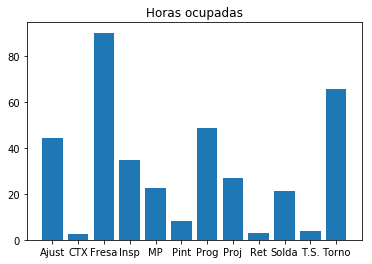

In [17]:
a=(totalf,totalt,totalp,totala,totalc,totals,totalts,totalm,totalra,totalpi,totalpr,totalin)
b=('Fresa','Torno','Prog','Ajust','CTX','Solda','T.S.','MP','Ret','Pint','Proj','Insp')
plt.bar(b,a)
plt.title('Horas ocupadas')

Text(0,0.5,'Quantidade')

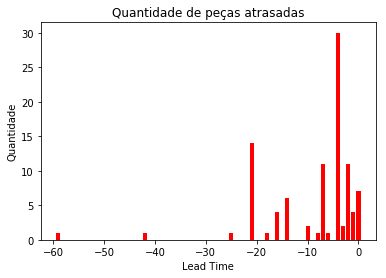

In [18]:
s=arquivo.query('ENTREGA == "NOK"')['LEAD TIME'].value_counts().keys()

k={}
for lead,quant in arquivo.query('ENTREGA == "NOK"')['LEAD TIME'].value_counts().items():
    k[lead]=quant
h=[]
j=[]
c=0
for x in sorted(k):
    h.append(x)
    j.append(k[x])
    if x<1:
        c+=1

       
e=h[:c]
r=j[:c]

plt.bar(e,r,color='red')
plt.title('Quantidade de peças atrasadas')
plt.xlabel('Lead Time')
plt.ylabel('Quantidade')


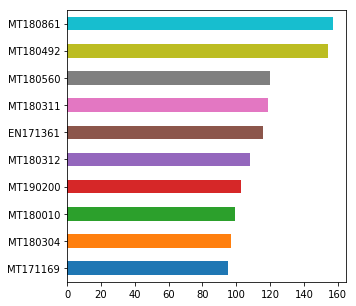

In [19]:
arquivo.query('ENTREGA == "OK"')['P.O.:'].value_counts().sort_values().tail(10).plot(kind='barh',figsize=(5,5))
